# Imports

In [36]:
from pathlib import Path
import matplotlib.pyplot as plt
import networkx as nx
import requests
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.dpi"] = 100

# Functions showcase

In [6]:
data_dir = Path('data')
edge_path = data_dir / 'the_lord_of_the_rings_edgelist.txt'
adj_path = data_dir / 'the_lord_of_the_rings_adjlist.txt'

url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_adjlist.txt'
open(adj_path, 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_edgelist.txt'
open(edge_path, 'wb').write(requests.get(url).content);

A common representation of a graph is an adjacency matrix, but many real-world graphs are sparse (many zeros in an adjacency matrix), so in most cases data is stored in cheap sparse formats
1. edge list
2. adjacency list

Edge list is a list of pairs of nodes — a target and destination of edges. Here is an edge list of an interaction network of films "The Lord of the Rings" (2001-2003).

In [7]:
with open(edge_path) as f:
    print(f.read()[:197])

ARAGORN, ELROND
ARAGORN, EOMER
ARAGORN, EOWYN
ARAGORN, GIMLI
ARAGORN, LEGOLAS
ARAGORN, MERRY
ARAGORN, PIPPIN
ARAGORN, THEODEN
ARAGORN, GANDALF
ARAGORN, KING OF THE DEAD
ARWEN, ELROND
BILBO, ELROND



Adjacency list is a list of lists of nodes where the first node is a root and others are leafs

In [8]:
with open(adj_path) as f:
    print(f.read()[:190])

FRODO, SMEAGOL, GALADRIEL, GANDALF, GORBAG
SMEAGOL, GOLLUM, SAM
GALADRIEL, GANDALF, SAM
GANDALF, GIMLI, LEGOLAS, MERRY, PIPPIN, SAM, SOLDIER, THEODEN, TREEBEARD, IORLAS
GORBAG, SAM, SHAGRAT



For most cases we can use given functions in networkx:

* `nx.read_adjlist`
* `nx.read_edgelist`
* `nx.read_weighted_edgelist`

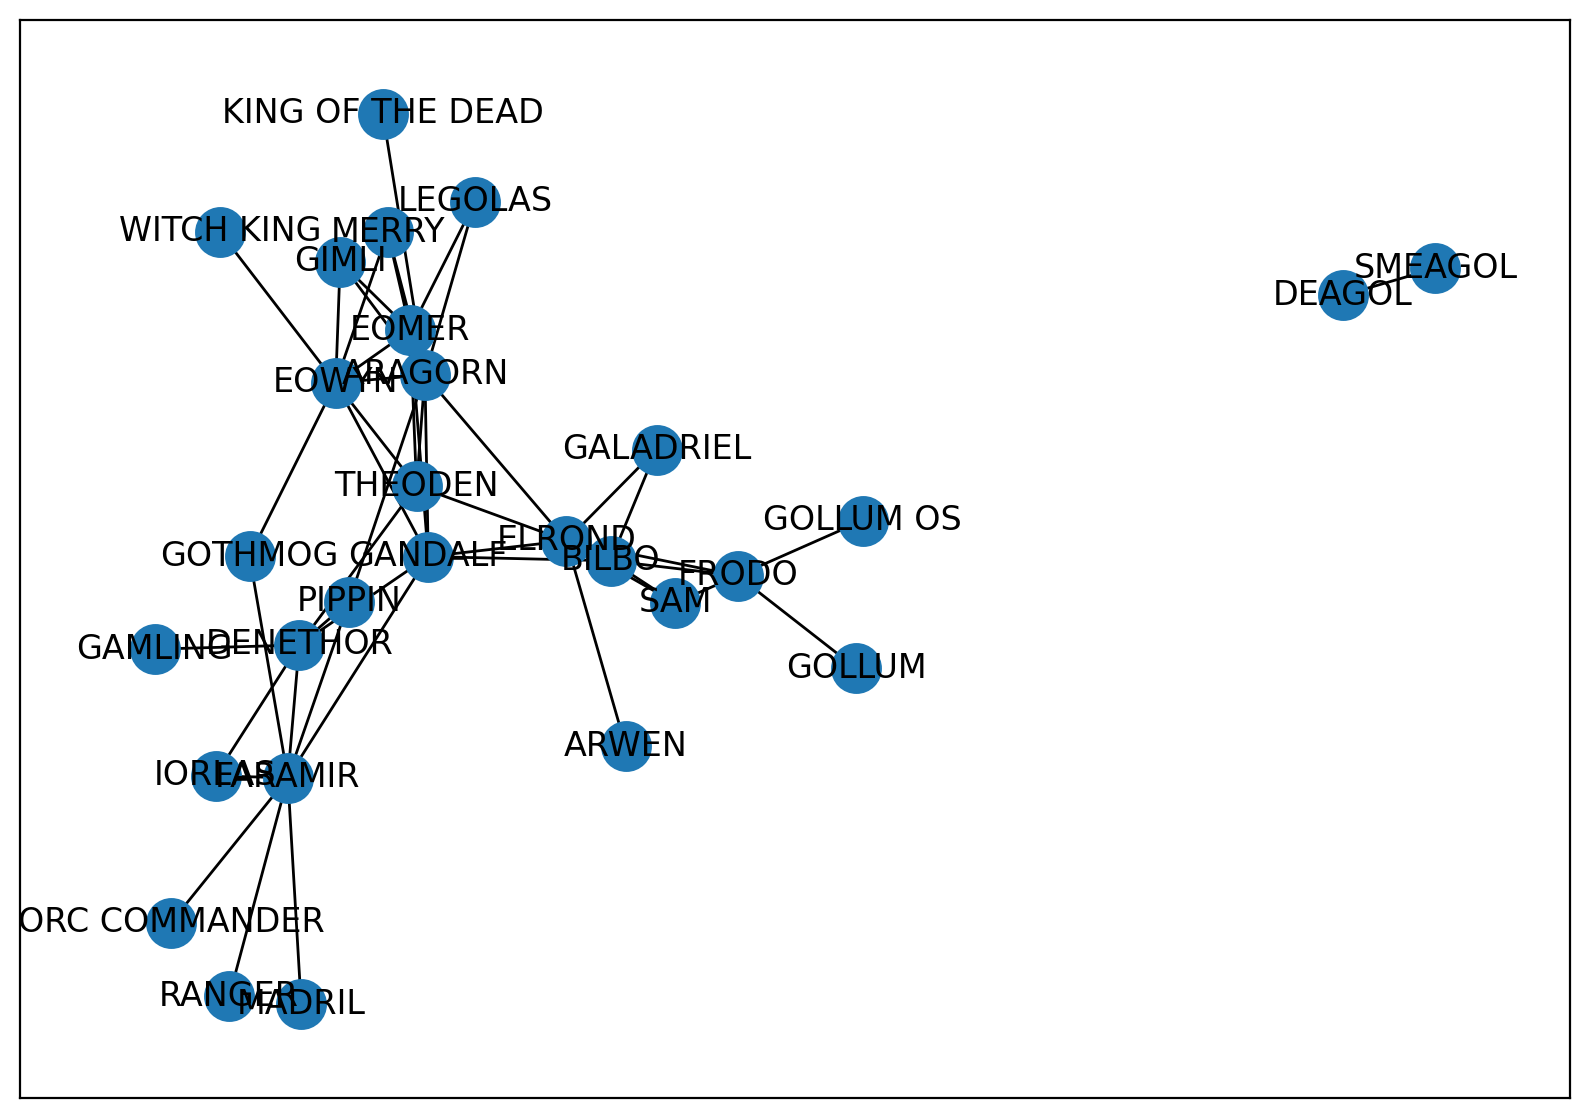

In [39]:
G = nx.read_edgelist(edge_path, delimiter=', ')
plt.figure(figsize=(10, 7))
nx.draw_networkx(G)

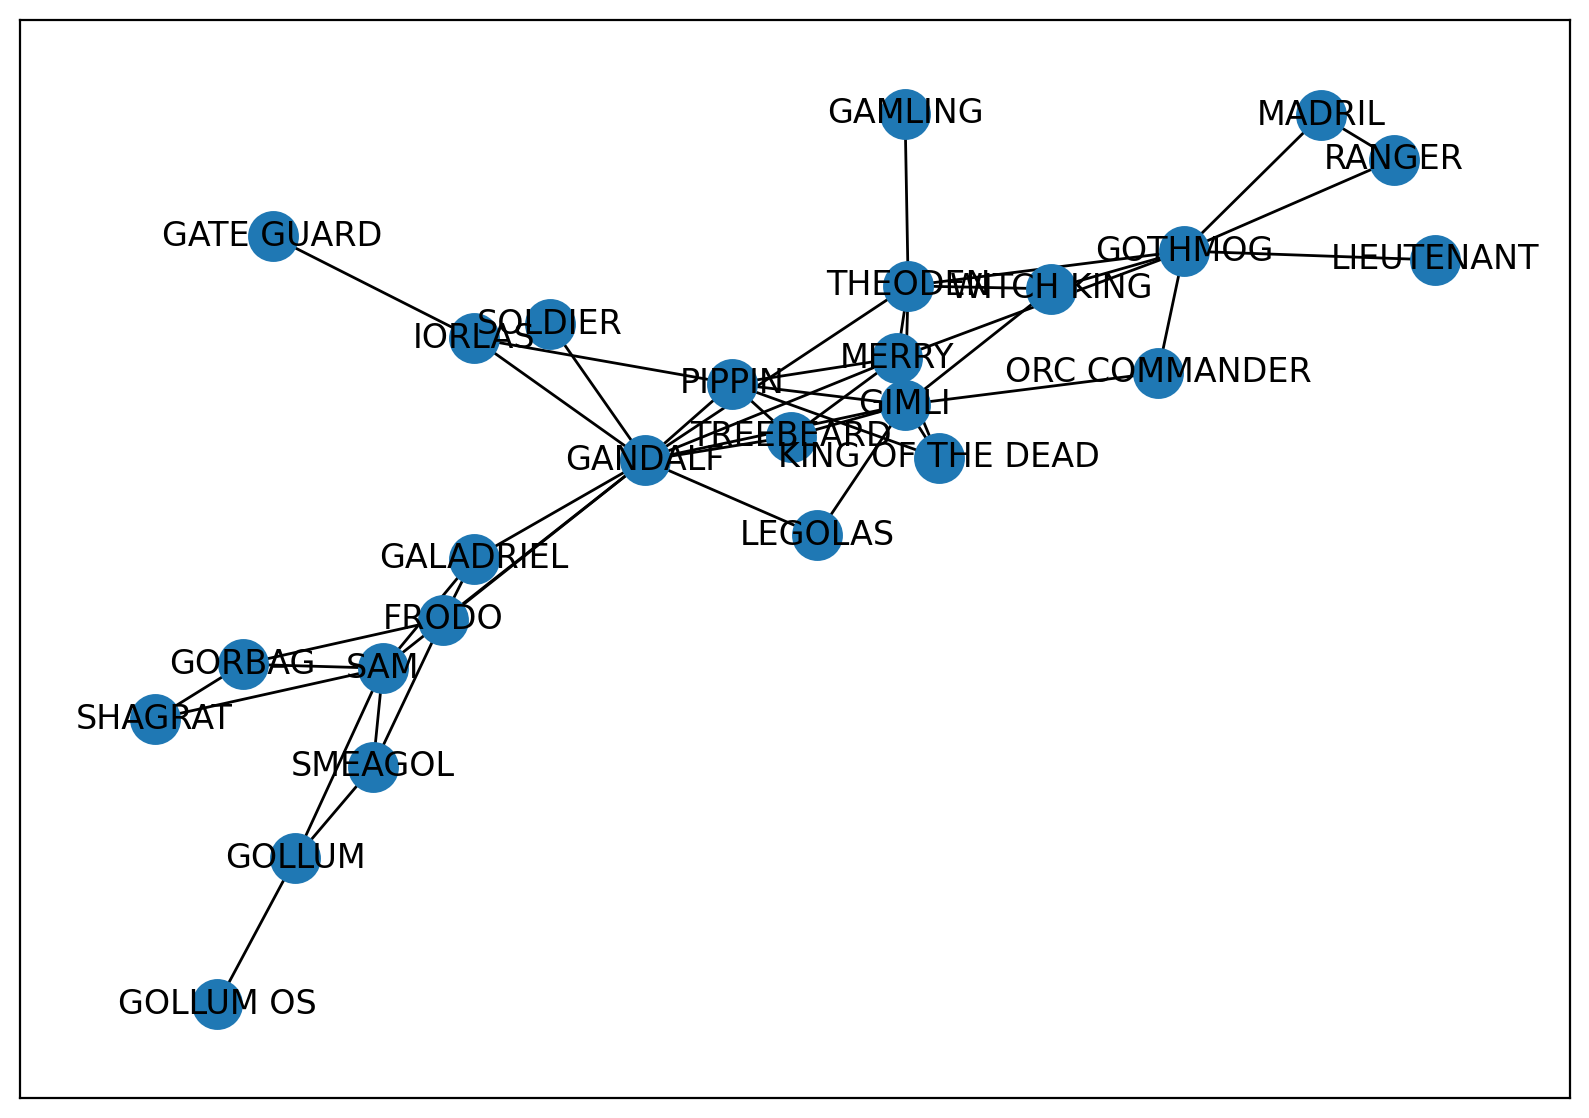

In [41]:
G = nx.read_adjlist(adj_path, delimiter=', ')

plt.figure(figsize=(10, 7))
nx.draw_networkx(G, arrows=True)

In [42]:
G['RANGER']

AtlasView({'GOTHMOG': {}, 'MADRIL': {}})

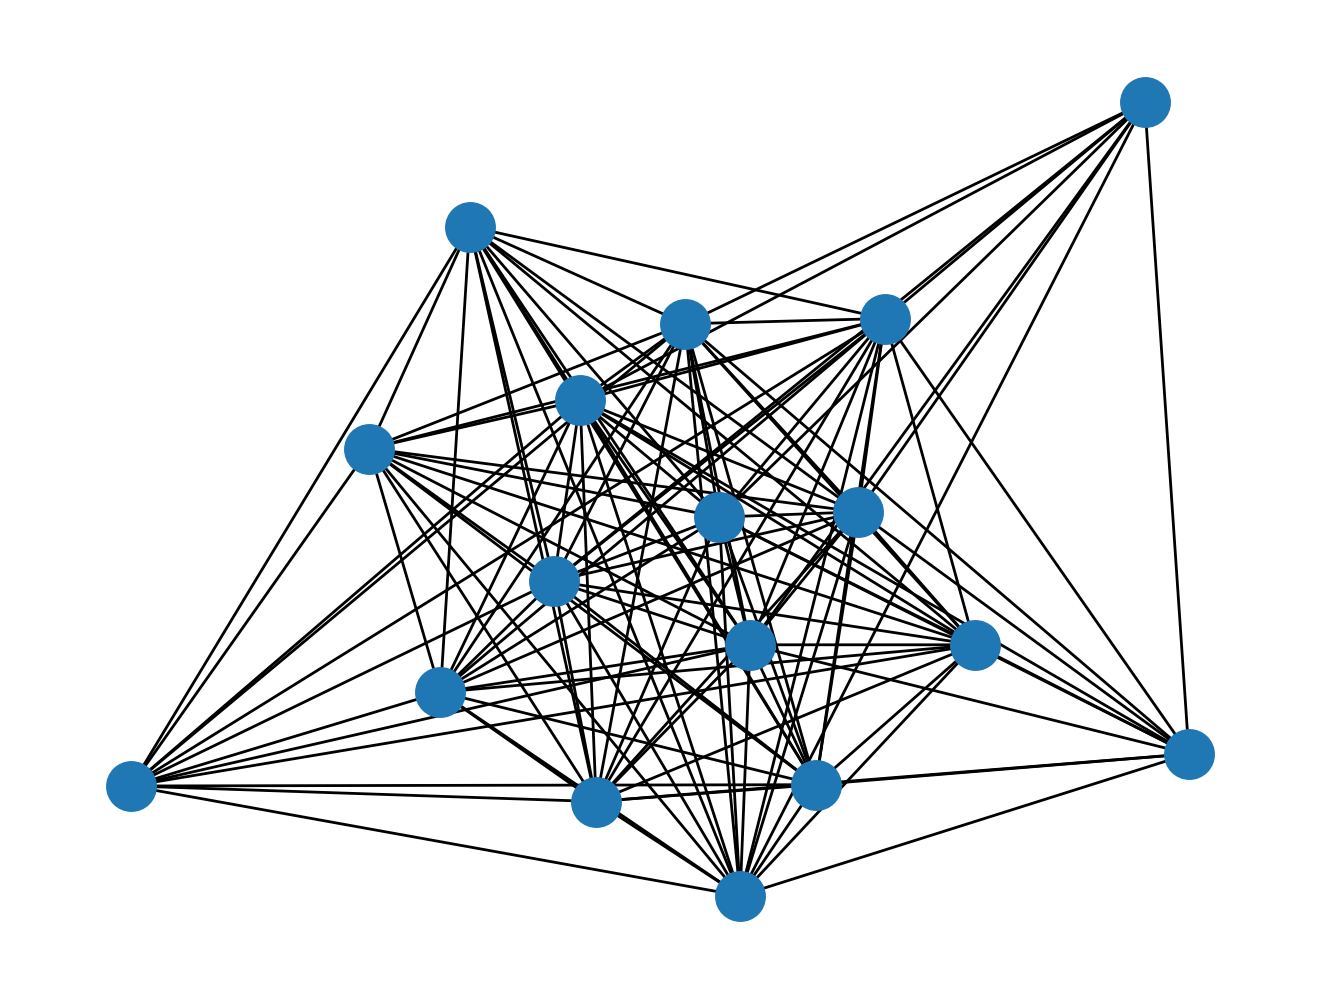

In [45]:
G = nx.read_weighted_edgelist(data_dir / 'aves-barn-swallow-non-physical.edges')
nx.draw(G)

In [50]:
nx.get_edge_attributes(G, 'weight')

{('1', '2'): 4.0,
 ('1', '3'): 6.0,
 ('1', '4'): 5.0,
 ('1', '5'): 11.0,
 ('1', '6'): 5.0,
 ('1', '7'): 4.0,
 ('1', '8'): 12.0,
 ('1', '9'): 8.0,
 ('1', '10'): 6.0,
 ('1', '11'): 1.0,
 ('1', '12'): 6.0,
 ('1', '13'): 7.0,
 ('1', '14'): 7.0,
 ('1', '15'): 8.0,
 ('1', '16'): 4.0,
 ('1', '17'): 52.0,
 ('2', '3'): 10.0,
 ('2', '4'): 8.0,
 ('2', '5'): 10.0,
 ('2', '7'): 4.0,
 ('2', '8'): 6.0,
 ('2', '9'): 5.0,
 ('2', '10'): 20.0,
 ('2', '11'): 6.0,
 ('2', '12'): 6.0,
 ('2', '13'): 8.0,
 ('2', '14'): 4.0,
 ('2', '15'): 15.0,
 ('2', '16'): 1.0,
 ('2', '17'): 4.0,
 ('3', '4'): 7.0,
 ('3', '5'): 16.0,
 ('3', '7'): 2.0,
 ('3', '8'): 5.0,
 ('3', '9'): 5.0,
 ('3', '10'): 15.0,
 ('3', '11'): 4.0,
 ('3', '12'): 3.0,
 ('3', '13'): 18.0,
 ('3', '14'): 4.0,
 ('3', '15'): 10.0,
 ('3', '16'): 3.0,
 ('3', '17'): 4.0,
 ('4', '5'): 7.0,
 ('4', '6'): 1.0,
 ('4', '7'): 2.0,
 ('4', '8'): 7.0,
 ('4', '9'): 10.0,
 ('4', '10'): 11.0,
 ('4', '11'): 5.0,
 ('4', '12'): 3.0,
 ('4', '13'): 5.0,
 ('4', '14'): 3.0,
 ('4

TL;DR

nx.read_edgelist - читает файл, в нем на каждой строчке указана одна связь

nx.read_adjlist - читает файл, в нем на каждой строчке сначала указана узел, а потом узлы, которые с ней связаны (при этом если связь узла была уже указана выше в текстовом файле, она может не повториться)